## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [42]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [43]:
train, test = keras.datasets.cifar10.load_data()

In [44]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [45]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [52]:
from keras.regularizers import l1,l2,l1_l2

def build_mlp(input_shape,output_units=10, num_neurons=[512, 256, 128],l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1(l1_ratio))(x)
            
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs = [input_layer],outputs = [out])
    
    return model

In [53]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]


In [54]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True,momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle = True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 sampl

50000/50000 [==============================] - 9s 170us/step - loss: 2.4626 - acc: 0.0982 - val_loss: 2.4625 - val_acc: 0.1000
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.0185 - acc: 0.2726 - val_loss: 1.8674 - val_acc: 0.3373
Epoch 2/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.7992 - acc: 0.3661 - val_loss: 1.7520 - val_acc: 0.3852
Epoch 3/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7206 - acc: 0.3932 - val_loss: 1.6935 - val_acc: 0.4042
Epoch 4/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6637 - acc: 0.4144 - val_loss: 1.6506 - val_acc: 0.4206
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.6146 - acc: 0.4336 - val_loss: 1.6096 - val_acc: 0.4347
Epoch 6/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.5772 - acc: 0.4472 - val_loss: 1.5654 - val_acc: 0.4503
Epoch 7/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.5432 - acc: 0.4571 - val_loss: 1.5547 - 

Epoch 15/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3425 - acc: 0.5280 - val_loss: 1.4506 - val_acc: 0.4822
Epoch 16/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3286 - acc: 0.5317 - val_loss: 1.4088 - val_acc: 0.4959
Epoch 17/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.3094 - acc: 0.5401 - val_loss: 1.3982 - val_acc: 0.5005
Epoch 18/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2903 - acc: 0.5464 - val_loss: 1.3804 - val_acc: 0.5075
Epoch 19/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2732 - acc: 0.5536 - val_loss: 1.3806 - val_acc: 0.5114
Epoch 20/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2587 - acc: 0.5559 - val_loss: 1.3663 - val_acc: 0.5175
Epoch 21/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2427 - acc: 0.5623 - val_loss: 1.3638 - val_acc: 0.5108
Epoch 22/50
50000/50000 [==

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



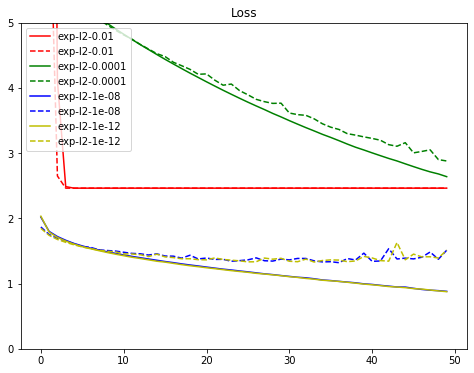

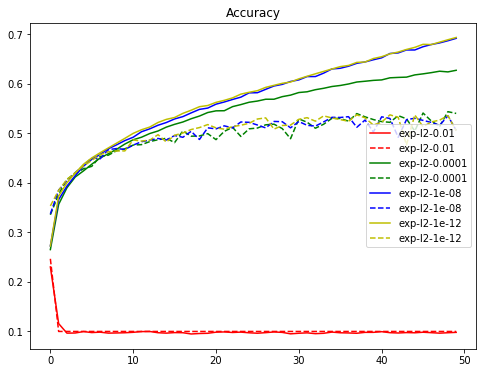

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [65]:
from keras.regularizers import l1,l2,l1_l2

def build_mlp(input_shape,output_units=10, num_neurons=[512, 256, 128, 64, 32],l1_l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1_l2(l1=0.03, l2=0.01))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1_l2(l1=0.03, l2=0.01))(x)
            
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs = [input_layer],outputs = [out])
    
    return model

In [66]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [67]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True,momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle = True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)

50000/50000 [==============================] - 11s 223us/step - loss: 300.9680 - acc: 0.1098 - val_loss: 10.1221 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 181us/step - loss: 5.1744 - acc: 0.0984 - val_loss: 3.7663 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 183us/step - loss: 3.7517 - acc: 0.0976 - val_loss: 3.7495 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 181us/step - loss: 3.7493 - acc: 0.0984 - val_loss: 3.7492 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 3.7489 - acc: 0.0972 - val_loss: 3.7475 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 201us/step - loss: 3.7485 - acc: 0.0993 - val_loss: 3.7486 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 189us/step - loss: 3.7482 - acc: 0.0972 - val_loss: 3.7458 - val_acc: 0.1000
Epoch 8/50
50000/50000 [================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50000/50000 [==============================] - 9s 183us/step - loss: 3.7449 - acc: 0.0970 - val_loss: 3.7445 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 9s 185us/step - loss: 3.7448 - acc: 0.0978 - val_loss: 3.7436 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 9s 180us/step - loss: 3.7447 - acc: 0.0960 - val_loss: 3.7441 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 9s 183us/step - loss: 3.7446 - acc: 0.0971 - val_loss: 3.7437 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 9s 182us/step - loss: 3.7444 - acc: 0.0987 - val_loss: 3.7430 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 9s 182us/step - loss: 3.7443 - acc: 0.0983 - val_loss: 3.7415 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 9s 181us/step - loss: 3.7441 - acc: 0.0988 - val_loss: 3.7450 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============

50000/50000 [==============================] - 9s 179us/step - loss: 3.7452 - acc: 0.0964 - val_loss: 3.7435 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 9s 179us/step - loss: 3.7451 - acc: 0.0991 - val_loss: 3.7434 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 9s 183us/step - loss: 3.7450 - acc: 0.0969 - val_loss: 3.7422 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 9s 184us/step - loss: 3.7449 - acc: 0.0978 - val_loss: 3.7436 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 9s 181us/step - loss: 3.7449 - acc: 0.0970 - val_loss: 3.7436 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 9s 179us/step - loss: 3.7447 - acc: 0.0992 - val_loss: 3.7426 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 9s 179us/step - loss: 3.7445 - acc: 0.0975 - val_loss: 3.7423 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============

50000/50000 [==============================] - 9s 178us/step - loss: 3.7452 - acc: 0.0980 - val_loss: 3.7437 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 9s 177us/step - loss: 3.7451 - acc: 0.0990 - val_loss: 3.7439 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 12s 234us/step - loss: 3.7451 - acc: 0.0979 - val_loss: 3.7442 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 14s 282us/step - loss: 3.7449 - acc: 0.0988 - val_loss: 3.7431 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 10s 203us/step - loss: 3.7449 - acc: 0.0987 - val_loss: 3.7437 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 12s 234us/step - loss: 3.7448 - acc: 0.0981 - val_loss: 3.7447 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 12s 234us/step - loss: 3.7446 - acc: 0.0964 - val_loss: 3.7422 - val_acc: 0.1000
Epoch 27/50
50000/50000 [=========

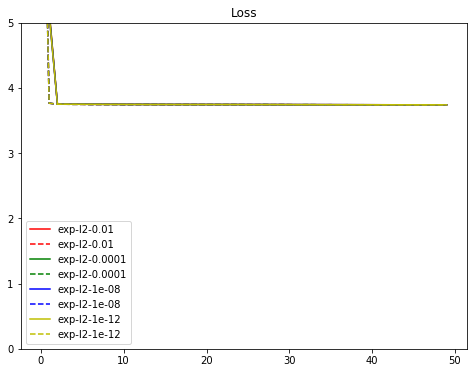

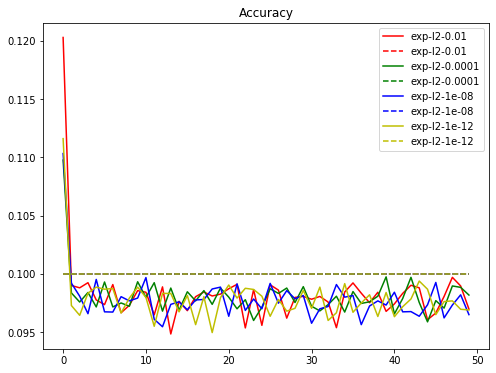

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [69]:
from keras.regularizers import l1,l2,l1_l2

def build_mlp(input_shape,output_units=10, num_neurons=[512, 256, 128, 64, 32],l1_l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1_l2(l1=0.01, l2=0.03))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1),kernel_regularizer=l1_l2(l1=0.01, l2=0.03))(x)
            
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs = [input_layer],outputs = [out])
    
    return model

In [70]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [71]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True,momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle = True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)

50000/50000 [==============================] - 9s 179us/step - loss: 2.4608 - acc: 0.0980 - val_loss: 2.4609 - val_acc: 0.1000
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)     

50000/50000 [==============================] - 9s 179us/step - loss: 2.4609 - acc: 0.0979 - val_loss: 2.4608 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.4608 - acc: 0.0987 - val_loss: 2.4608 - val_acc: 0.1000
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 6

50000/50000 [==============================] - 10s 197us/step - loss: 2.4609 - acc: 0.0949 - val_loss: 2.4608 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.4608 - acc: 0.0983 - val_loss: 2.4607 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.4608 - acc: 0.0989 - val_loss: 2.4608 - val_acc: 0.1000
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)       

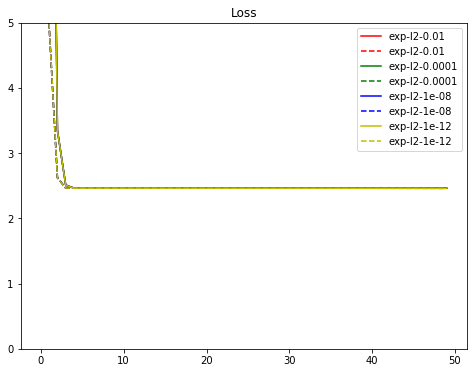

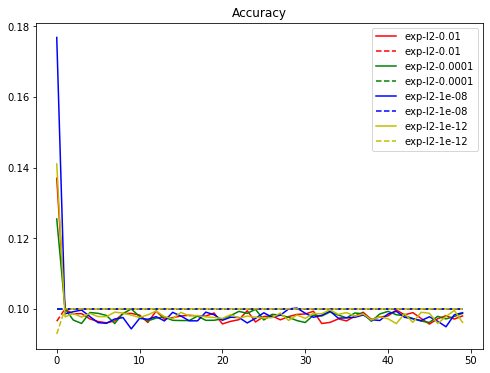

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()